### Test LinUCB, ThresholdBandit and GreedyBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [4]:
alphas = (0, 2)
betas = (1, 0)
N = 4000
M = 100
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [6]:
linucb = LinUCB(generator)

linucb_pred = np.zeros((M, 2, N))
linucb_upper = np.zeros((M, 2, N))
linucb_lower = np.zeros((M, 2, N))

for i in range(N):
    (ctx, arm_idx, obs, regret) = linucb.step()
    p0, u0, l0 = linucb.pred_arm(0, M)
    p1, u1, l1 = linucb.pred_arm(1, M)
    linucb_pred[:,0,i] = p0
    linucb_upper[:,0,i] = u0
    linucb_lower[:,0,i] = l0
    linucb_pred[:,1,i] = p1
    linucb_upper[:,1,i] = u1
    linucb_lower[:,1,i] = l1    

theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.02381706]
 [ 1.97137951]
 [ 0.99986852]
 [-0.0110492 ]]


In [7]:
#Make plots of LinUCB confidence interval
xvals = np.linspace(-0.5, 1.5, M)
preds = np.zeros((M, 2))
preds_up = np.zeros((M, 2))
preds_low = np.zeros((M, 2))
for arm_idx in range(2):
    for i in range(M):
        preds[i,arm_idx] = linucb.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower(xvals[i], arm_idx)

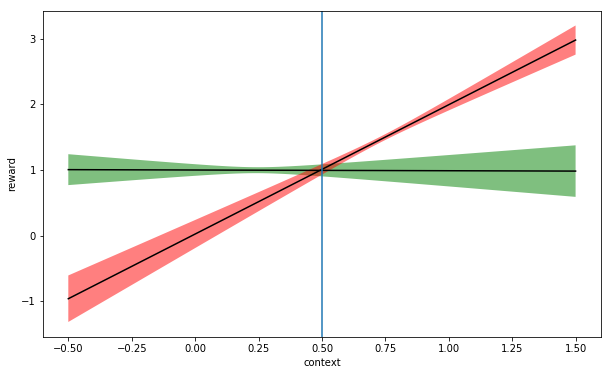

In [8]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

### Threshold bandit

In [9]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
print thresholdbandit.threshold

thresh_pred = np.zeros((M, 2, N))
thresh_upper = np.zeros((M, 2, N))
thresh_lower = np.zeros((M, 2, N))

for i in range(N):
    (ctx, arm_idx, obs, regret) = thresholdbandit.step()
    p0, u0, l0 = thresholdbandit.pred_arm(0, M)
    p1, u1, l1 = thresholdbandit.pred_arm(1, M)
    thresh_pred[:,0,i] = p0
    thresh_upper[:,0,i] = u0
    thresh_lower[:,0,i] = l0
    thresh_pred[:,1,i] = p1
    thresh_upper[:,1,i] = u1
    thresh_lower[:,1,i] = l1
    thr = thresholdbandit.threshold
    lb = thresholdbandit.lower_bound
    ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f,thr:%f,lb:%f,ub:%f"%(i, ctx, arm_idx, obs, regret, thr, lb, ub))

theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

0.8
i:0,ctx:0.814488,arm:1,rew:1.630958,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:1,ctx:0.743901,arm:0,rew:1.030678,regret:0.487802,thr:0.800000,lb:0.000000,ub:1.000000
i:2,ctx:0.306924,arm:0,rew:1.127726,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:3,ctx:0.126686,arm:0,rew:0.990237,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:4,ctx:0.908761,arm:1,rew:1.960663,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:5,ctx:0.368274,arm:0,rew:0.946415,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:6,ctx:0.025749,arm:0,rew:0.992049,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:7,ctx:0.104181,arm:0,rew:1.008470,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:8,ctx:0.882761,arm:1,rew:1.731370,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:9,ctx:0.741108,arm:0,rew:1.260920,regret:0.482216,thr:0.800000,lb:0.000000,ub:1.000000
i:10,ctx:0.648907,arm:0,rew:1.092194,regret:0.297814,thr:0.800000,lb:0.000000,ub:1.000000
i:11,ctx:0.33137

i:92,ctx:0.456291,arm:0,rew:1.116720,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:93,ctx:0.252849,arm:0,rew:0.900185,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:94,ctx:0.892876,arm:1,rew:1.639526,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:95,ctx:0.679216,arm:0,rew:1.068593,regret:0.358433,thr:0.800000,lb:0.000000,ub:1.000000
i:96,ctx:0.739681,arm:0,rew:1.166441,regret:0.479362,thr:0.800000,lb:0.000000,ub:1.000000
i:97,ctx:0.216648,arm:0,rew:0.890243,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:98,ctx:0.093188,arm:0,rew:0.978962,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:99,ctx:0.676767,arm:0,rew:1.063182,regret:0.353534,thr:0.800000,lb:0.000000,ub:1.000000
i:100,ctx:0.118834,arm:0,rew:0.957610,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:101,ctx:0.696406,arm:0,rew:1.021180,regret:0.392811,thr:0.800000,lb:0.000000,ub:1.000000
i:102,ctx:0.391852,arm:0,rew:0.939824,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:103,c

i:186,ctx:0.175392,arm:0,rew:0.891871,regret:0.000000,thr:0.797980,lb:0.000000,ub:0.797980
i:187,ctx:0.392023,arm:0,rew:0.864344,regret:0.000000,thr:0.797980,lb:0.000000,ub:0.797980
i:188,ctx:0.665797,arm:0,rew:0.959539,regret:0.331594,thr:0.797980,lb:0.000000,ub:0.797980
i:189,ctx:0.676917,arm:0,rew:0.989058,regret:0.353833,thr:0.787879,lb:0.000000,ub:0.787879
i:190,ctx:0.144288,arm:0,rew:0.778507,regret:0.000000,thr:0.787879,lb:0.000000,ub:0.787879
i:191,ctx:0.698440,arm:0,rew:1.064858,regret:0.396880,thr:0.787879,lb:0.000000,ub:0.787879
i:192,ctx:0.981014,arm:1,rew:2.041609,regret:0.000000,thr:0.787879,lb:0.000000,ub:0.787879
i:193,ctx:0.641389,arm:0,rew:0.997267,regret:0.282779,thr:0.777778,lb:0.000000,ub:0.777778
i:194,ctx:0.615057,arm:0,rew:0.735242,regret:0.230114,thr:0.777778,lb:0.000000,ub:0.777778
i:195,ctx:0.518850,arm:0,rew:0.973190,regret:0.037699,thr:0.777778,lb:0.000000,ub:0.777778
i:196,ctx:0.229823,arm:0,rew:0.856303,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778

i:277,ctx:0.917453,arm:1,rew:2.066077,regret:0.000000,thr:0.717172,lb:0.000000,ub:0.717172
i:278,ctx:0.077398,arm:0,rew:0.911679,regret:0.000000,thr:0.717172,lb:0.000000,ub:0.717172
i:279,ctx:0.947513,arm:1,rew:1.854173,regret:0.000000,thr:0.717172,lb:0.000000,ub:0.717172
i:280,ctx:0.668447,arm:0,rew:0.994786,regret:0.336895,thr:0.717172,lb:0.000000,ub:0.717172
i:281,ctx:0.510237,arm:0,rew:0.956970,regret:0.020474,thr:0.717172,lb:0.000000,ub:0.717172
i:282,ctx:0.994651,arm:1,rew:2.037765,regret:0.000000,thr:0.717172,lb:0.000000,ub:0.717172
i:283,ctx:0.567262,arm:0,rew:1.043217,regret:0.134523,thr:0.717172,lb:0.000000,ub:0.717172
i:284,ctx:0.997026,arm:1,rew:2.097495,regret:0.000000,thr:0.717172,lb:0.000000,ub:0.717172
i:285,ctx:0.801957,arm:1,rew:1.645661,regret:0.000000,thr:0.707071,lb:0.000000,ub:0.707071
i:286,ctx:0.211205,arm:0,rew:1.070650,regret:0.000000,thr:0.707071,lb:0.000000,ub:0.707071
i:287,ctx:0.892199,arm:1,rew:1.804029,regret:0.000000,thr:0.707071,lb:0.000000,ub:0.707071

i:370,ctx:0.984640,arm:1,rew:1.957637,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:371,ctx:0.649477,arm:0,rew:1.182849,regret:0.298954,thr:0.686869,lb:0.000000,ub:0.686869
i:372,ctx:0.320413,arm:0,rew:1.065077,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:373,ctx:0.801932,arm:1,rew:1.544721,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:374,ctx:0.625187,arm:0,rew:1.101394,regret:0.250373,thr:0.686869,lb:0.000000,ub:0.686869
i:375,ctx:0.705431,arm:1,rew:1.528667,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:376,ctx:0.750047,arm:1,rew:1.357815,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:377,ctx:0.205660,arm:0,rew:0.852617,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:378,ctx:0.487094,arm:0,rew:1.086524,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869
i:379,ctx:0.635686,arm:0,rew:0.858362,regret:0.271372,thr:0.686869,lb:0.000000,ub:0.686869
i:380,ctx:0.309689,arm:0,rew:1.106853,regret:0.000000,thr:0.686869,lb:0.000000,ub:0.686869

i:463,ctx:0.979837,arm:1,rew:2.009512,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:464,ctx:0.714604,arm:1,rew:1.499993,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:465,ctx:0.930567,arm:1,rew:1.863788,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:466,ctx:0.583484,arm:0,rew:1.111037,regret:0.166969,thr:0.666667,lb:0.000000,ub:0.666667
i:467,ctx:0.766879,arm:1,rew:1.492760,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:468,ctx:0.211669,arm:0,rew:1.042693,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:469,ctx:0.768119,arm:1,rew:1.656393,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:470,ctx:0.513992,arm:0,rew:0.959003,regret:0.027984,thr:0.666667,lb:0.000000,ub:0.666667
i:471,ctx:0.616294,arm:0,rew:0.893429,regret:0.232588,thr:0.666667,lb:0.000000,ub:0.666667
i:472,ctx:0.847778,arm:1,rew:1.691219,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:473,ctx:0.918582,arm:1,rew:1.651745,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667

i:560,ctx:0.203488,arm:0,rew:0.958376,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:561,ctx:0.235543,arm:0,rew:0.942857,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:562,ctx:0.085846,arm:0,rew:1.088300,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:563,ctx:0.265719,arm:0,rew:0.820381,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:564,ctx:0.118980,arm:0,rew:0.917809,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:565,ctx:0.190491,arm:0,rew:1.000579,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:566,ctx:0.759399,arm:1,rew:1.629860,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:567,ctx:0.931430,arm:1,rew:1.766008,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:568,ctx:0.918248,arm:1,rew:1.950236,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:569,ctx:0.295049,arm:0,rew:0.954465,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:570,ctx:0.020753,arm:0,rew:1.037186,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566

i:651,ctx:0.435559,arm:0,rew:0.876025,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:652,ctx:0.613211,arm:0,rew:1.085624,regret:0.226423,thr:0.646465,lb:0.000000,ub:0.646465
i:653,ctx:0.619854,arm:0,rew:0.970221,regret:0.239708,thr:0.646465,lb:0.000000,ub:0.646465
i:654,ctx:0.187517,arm:0,rew:1.042790,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:655,ctx:0.801554,arm:1,rew:1.639785,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:656,ctx:0.069912,arm:0,rew:1.046078,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:657,ctx:0.539223,arm:0,rew:0.884533,regret:0.078447,thr:0.646465,lb:0.000000,ub:0.646465
i:658,ctx:0.131032,arm:0,rew:0.968092,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:659,ctx:0.712474,arm:1,rew:1.544528,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:660,ctx:0.495217,arm:0,rew:0.876797,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:661,ctx:0.179503,arm:0,rew:1.034533,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465

i:745,ctx:0.926948,arm:1,rew:1.859234,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:746,ctx:0.142220,arm:0,rew:1.103822,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:747,ctx:0.115224,arm:0,rew:1.022468,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:748,ctx:0.295719,arm:0,rew:0.905274,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:749,ctx:0.770118,arm:1,rew:1.676750,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:750,ctx:0.959358,arm:1,rew:1.854022,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:751,ctx:0.109248,arm:0,rew:1.177683,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:752,ctx:0.746907,arm:1,rew:1.403438,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:753,ctx:0.279859,arm:0,rew:0.983741,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:754,ctx:0.646794,arm:1,rew:1.354692,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:755,ctx:0.416657,arm:0,rew:0.871978,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364

i:839,ctx:0.088452,arm:0,rew:0.962053,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:840,ctx:0.336525,arm:0,rew:1.009185,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:841,ctx:0.334563,arm:0,rew:0.894748,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:842,ctx:0.897655,arm:1,rew:2.068641,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:843,ctx:0.244423,arm:0,rew:0.826462,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:844,ctx:0.015947,arm:0,rew:1.054657,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:845,ctx:0.494147,arm:0,rew:0.959587,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:846,ctx:0.571061,arm:0,rew:1.022641,regret:0.142123,thr:0.636364,lb:0.000000,ub:0.636364
i:847,ctx:0.807212,arm:1,rew:1.626075,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:848,ctx:0.679184,arm:1,rew:1.149806,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:849,ctx:0.293428,arm:0,rew:1.205146,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364

i:936,ctx:0.053091,arm:0,rew:1.056186,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:937,ctx:0.602288,arm:0,rew:1.022753,regret:0.204576,thr:0.636364,lb:0.000000,ub:0.636364
i:938,ctx:0.286284,arm:0,rew:1.051731,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:939,ctx:0.882081,arm:1,rew:1.802434,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:940,ctx:0.788188,arm:1,rew:1.658054,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:941,ctx:0.127717,arm:0,rew:0.898294,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:942,ctx:0.058236,arm:0,rew:0.812170,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:943,ctx:0.323109,arm:0,rew:0.933221,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:944,ctx:0.956997,arm:1,rew:1.998556,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:945,ctx:0.488977,arm:0,rew:1.025437,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:946,ctx:0.418910,arm:0,rew:0.892079,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364

i:1027,ctx:0.617150,arm:0,rew:0.997632,regret:0.234301,thr:0.626263,lb:0.000000,ub:0.626263
i:1028,ctx:0.947967,arm:1,rew:1.770636,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1029,ctx:0.857812,arm:1,rew:1.707222,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1030,ctx:0.548919,arm:0,rew:0.886096,regret:0.097838,thr:0.626263,lb:0.000000,ub:0.626263
i:1031,ctx:0.010240,arm:0,rew:1.094724,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1032,ctx:0.000694,arm:0,rew:0.961334,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1033,ctx:0.024346,arm:0,rew:1.014436,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1034,ctx:0.500755,arm:0,rew:1.174143,regret:0.001509,thr:0.626263,lb:0.000000,ub:0.626263
i:1035,ctx:0.313324,arm:0,rew:1.017116,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1036,ctx:0.973160,arm:1,rew:2.086131,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1037,ctx:0.110266,arm:0,rew:0.807809,regret:0.000000,thr:0.626263,lb:0.000000,

i:1121,ctx:0.152561,arm:0,rew:0.987038,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1122,ctx:0.591060,arm:0,rew:1.128259,regret:0.182121,thr:0.626263,lb:0.000000,ub:0.626263
i:1123,ctx:0.271818,arm:0,rew:1.010502,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1124,ctx:0.547976,arm:0,rew:1.086485,regret:0.095952,thr:0.626263,lb:0.000000,ub:0.626263
i:1125,ctx:0.263778,arm:0,rew:0.943460,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1126,ctx:0.815256,arm:1,rew:1.721772,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1127,ctx:0.220853,arm:0,rew:1.239027,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1128,ctx:0.599790,arm:0,rew:0.972577,regret:0.199580,thr:0.626263,lb:0.000000,ub:0.626263
i:1129,ctx:0.475784,arm:0,rew:1.059369,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1130,ctx:0.663519,arm:1,rew:1.179824,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1131,ctx:0.301761,arm:0,rew:0.892606,regret:0.000000,thr:0.626263,lb:0.000000,

i:1214,ctx:0.488510,arm:0,rew:0.839438,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1215,ctx:0.249912,arm:0,rew:0.907547,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1216,ctx:0.903155,arm:1,rew:1.806487,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1217,ctx:0.594866,arm:0,rew:1.060906,regret:0.189731,thr:0.626263,lb:0.000000,ub:0.626263
i:1218,ctx:0.294836,arm:0,rew:0.970206,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1219,ctx:0.595294,arm:0,rew:1.013050,regret:0.190589,thr:0.626263,lb:0.000000,ub:0.626263
i:1220,ctx:0.482842,arm:0,rew:1.024045,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1221,ctx:0.146880,arm:0,rew:0.942367,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1222,ctx:0.193340,arm:0,rew:0.792480,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1223,ctx:0.770329,arm:1,rew:1.442776,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1224,ctx:0.792345,arm:1,rew:1.757425,regret:0.000000,thr:0.626263,lb:0.000000,

i:1308,ctx:0.188137,arm:0,rew:1.018857,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1309,ctx:0.073973,arm:0,rew:0.992698,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1310,ctx:0.563285,arm:0,rew:0.816731,regret:0.126569,thr:0.626263,lb:0.000000,ub:0.626263
i:1311,ctx:0.267515,arm:0,rew:0.947423,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1312,ctx:0.559586,arm:0,rew:1.164782,regret:0.119171,thr:0.626263,lb:0.000000,ub:0.626263
i:1313,ctx:0.069673,arm:0,rew:1.006180,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1314,ctx:0.408311,arm:0,rew:0.824397,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1315,ctx:0.522498,arm:0,rew:1.137451,regret:0.044995,thr:0.626263,lb:0.000000,ub:0.626263
i:1316,ctx:0.760662,arm:1,rew:1.617272,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1317,ctx:0.453589,arm:0,rew:1.053099,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1318,ctx:0.436009,arm:0,rew:1.008985,regret:0.000000,thr:0.626263,lb:0.000000,

i:1400,ctx:0.950230,arm:1,rew:1.860820,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1401,ctx:0.108629,arm:0,rew:0.907180,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1402,ctx:0.675985,arm:1,rew:1.218208,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1403,ctx:0.061679,arm:0,rew:0.882715,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1404,ctx:0.971923,arm:1,rew:2.023856,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1405,ctx:0.896129,arm:1,rew:1.537870,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1406,ctx:0.117393,arm:0,rew:1.073565,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1407,ctx:0.811584,arm:1,rew:1.625761,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1408,ctx:0.295817,arm:0,rew:1.010187,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1409,ctx:0.182788,arm:0,rew:1.151389,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1410,ctx:0.921584,arm:1,rew:1.771596,regret:0.000000,thr:0.616162,lb:0.000000,

i:1492,ctx:0.566507,arm:0,rew:0.977334,regret:0.133013,thr:0.616162,lb:0.000000,ub:0.616162
i:1493,ctx:0.719145,arm:1,rew:1.580135,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1494,ctx:0.158728,arm:0,rew:1.061812,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1495,ctx:0.868073,arm:1,rew:1.792160,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1496,ctx:0.421935,arm:0,rew:0.959467,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1497,ctx:0.397043,arm:0,rew:0.976370,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1498,ctx:0.238394,arm:0,rew:1.007336,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1499,ctx:0.696417,arm:1,rew:1.352874,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1500,ctx:0.992795,arm:1,rew:2.032625,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1501,ctx:0.415823,arm:0,rew:1.022445,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1502,ctx:0.987564,arm:1,rew:1.786998,regret:0.000000,thr:0.616162,lb:0.000000,

i:1585,ctx:0.209853,arm:0,rew:1.000757,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1586,ctx:0.428831,arm:0,rew:1.102340,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1587,ctx:0.190502,arm:0,rew:1.006475,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1588,ctx:0.276541,arm:0,rew:0.816039,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1589,ctx:0.317829,arm:0,rew:1.033292,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1590,ctx:0.397243,arm:0,rew:1.115372,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1591,ctx:0.884789,arm:1,rew:1.758852,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1592,ctx:0.949881,arm:1,rew:1.884184,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1593,ctx:0.856148,arm:1,rew:1.707195,regret:0.000000,thr:0.616162,lb:0.000000,ub:0.616162
i:1594,ctx:0.583254,arm:0,rew:1.159526,regret:0.166507,thr:0.616162,lb:0.000000,ub:0.616162
i:1595,ctx:0.492344,arm:0,rew:0.956941,regret:0.000000,thr:0.616162,lb:0.000000,

i:1676,ctx:0.509502,arm:0,rew:0.975958,regret:0.019004,thr:0.616162,lb:0.040404,ub:0.616162
i:1677,ctx:0.483150,arm:0,rew:0.911577,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1678,ctx:0.763944,arm:1,rew:1.620527,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1679,ctx:0.424243,arm:0,rew:0.816485,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1680,ctx:0.129434,arm:0,rew:1.095432,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1681,ctx:0.750795,arm:1,rew:1.512680,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1682,ctx:0.746350,arm:1,rew:1.360697,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1683,ctx:0.113478,arm:0,rew:1.026338,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1684,ctx:0.741368,arm:1,rew:1.363148,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1685,ctx:0.711887,arm:1,rew:1.428461,regret:0.000000,thr:0.616162,lb:0.040404,ub:0.616162
i:1686,ctx:0.368109,arm:0,rew:0.905767,regret:0.000000,thr:0.616162,lb:0.040404,

i:1767,ctx:0.165909,arm:0,rew:1.044492,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1768,ctx:0.177994,arm:0,rew:0.980182,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1769,ctx:0.533088,arm:0,rew:0.936951,regret:0.066176,thr:0.616162,lb:0.101010,ub:0.616162
i:1770,ctx:0.776376,arm:1,rew:1.279594,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1771,ctx:0.322575,arm:0,rew:1.230982,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1772,ctx:0.932308,arm:1,rew:1.729507,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1773,ctx:0.645751,arm:1,rew:1.372730,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1774,ctx:0.854303,arm:1,rew:1.871692,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1775,ctx:0.702414,arm:1,rew:1.248307,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1776,ctx:0.258309,arm:0,rew:0.988087,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1777,ctx:0.173480,arm:0,rew:0.846941,regret:0.000000,thr:0.616162,lb:0.101010,

i:1858,ctx:0.151177,arm:0,rew:0.908203,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1859,ctx:0.972822,arm:1,rew:1.941631,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1860,ctx:0.942279,arm:1,rew:1.999626,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1861,ctx:0.463194,arm:0,rew:1.101761,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1862,ctx:0.379216,arm:0,rew:0.875402,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1863,ctx:0.438106,arm:0,rew:1.019406,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1864,ctx:0.693517,arm:1,rew:1.387985,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1865,ctx:0.725330,arm:1,rew:1.316469,regret:0.000000,thr:0.606061,lb:0.141414,ub:0.606061
i:1866,ctx:0.831181,arm:1,rew:1.734503,regret:0.000000,thr:0.606061,lb:0.141414,ub:0.606061
i:1867,ctx:0.067211,arm:0,rew:0.648423,regret:0.000000,thr:0.606061,lb:0.131313,ub:0.606061
i:1868,ctx:0.925318,arm:1,rew:1.856758,regret:0.000000,thr:0.606061,lb:0.131313,

i:1949,ctx:0.897500,arm:1,rew:1.841894,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1950,ctx:0.873268,arm:1,rew:1.723377,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1951,ctx:0.428210,arm:0,rew:1.129480,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1952,ctx:0.357797,arm:0,rew:1.051601,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1953,ctx:0.904775,arm:1,rew:1.897032,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1954,ctx:0.193730,arm:0,rew:0.750285,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1955,ctx:0.623227,arm:1,rew:1.192930,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1956,ctx:0.092046,arm:0,rew:0.862818,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1957,ctx:0.567376,arm:0,rew:1.009053,regret:0.134751,thr:0.606061,lb:0.161616,ub:0.606061
i:1958,ctx:0.535384,arm:0,rew:0.975424,regret:0.070768,thr:0.606061,lb:0.161616,ub:0.606061
i:1959,ctx:0.878858,arm:1,rew:1.798338,regret:0.000000,thr:0.606061,lb:0.161616,

i:2040,ctx:0.002508,arm:0,rew:1.109096,regret:0.000000,thr:0.606061,lb:0.181818,ub:0.606061
i:2041,ctx:0.697879,arm:1,rew:1.241606,regret:0.000000,thr:0.606061,lb:0.181818,ub:0.606061
i:2042,ctx:0.602881,arm:0,rew:0.948134,regret:0.205761,thr:0.606061,lb:0.181818,ub:0.606061
i:2043,ctx:0.612982,arm:1,rew:1.090853,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2044,ctx:0.764038,arm:1,rew:1.539779,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2045,ctx:0.207353,arm:0,rew:0.946209,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2046,ctx:0.334718,arm:0,rew:1.032201,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2047,ctx:0.682283,arm:1,rew:1.353548,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2048,ctx:0.781701,arm:1,rew:1.517248,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2049,ctx:0.180608,arm:0,rew:0.878379,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2050,ctx:0.447673,arm:0,rew:0.885309,regret:0.000000,thr:0.606061,lb:0.191919,

i:2132,ctx:0.635926,arm:1,rew:1.237267,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2133,ctx:0.634492,arm:1,rew:1.476216,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2134,ctx:0.540988,arm:0,rew:0.719352,regret:0.081975,thr:0.606061,lb:0.202020,ub:0.606061
i:2135,ctx:0.791580,arm:1,rew:1.515968,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2136,ctx:0.377572,arm:0,rew:0.740848,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2137,ctx:0.991449,arm:1,rew:2.062641,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2138,ctx:0.141995,arm:0,rew:1.009023,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2139,ctx:0.726769,arm:1,rew:1.531872,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2140,ctx:0.807981,arm:1,rew:1.516297,regret:0.000000,thr:0.606061,lb:0.202020,ub:0.606061
i:2141,ctx:0.643862,arm:1,rew:1.248475,regret:0.000000,thr:0.606061,lb:0.212121,ub:0.606061
i:2142,ctx:0.025079,arm:0,rew:0.938201,regret:0.000000,thr:0.606061,lb:0.212121,

i:2224,ctx:0.159593,arm:0,rew:0.900870,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2225,ctx:0.513162,arm:0,rew:1.137467,regret:0.026325,thr:0.606061,lb:0.222222,ub:0.606061
i:2226,ctx:0.626527,arm:1,rew:1.336996,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2227,ctx:0.317077,arm:0,rew:1.165485,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2228,ctx:0.948197,arm:1,rew:1.825757,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2229,ctx:0.317868,arm:0,rew:0.908223,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2230,ctx:0.825350,arm:1,rew:1.586056,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2231,ctx:0.684636,arm:1,rew:1.225015,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2232,ctx:0.325418,arm:0,rew:1.028034,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2233,ctx:0.765159,arm:1,rew:1.592711,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2234,ctx:0.684332,arm:1,rew:1.240146,regret:0.000000,thr:0.606061,lb:0.222222,

i:2317,ctx:0.960671,arm:1,rew:1.898542,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2318,ctx:0.041562,arm:0,rew:1.071217,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2319,ctx:0.237847,arm:0,rew:0.808001,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2320,ctx:0.677327,arm:1,rew:1.360068,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2321,ctx:0.455489,arm:0,rew:1.190071,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2322,ctx:0.779439,arm:1,rew:1.587165,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2323,ctx:0.180135,arm:0,rew:0.841268,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2324,ctx:0.112245,arm:0,rew:1.089159,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2325,ctx:0.073581,arm:0,rew:0.871791,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2326,ctx:0.138415,arm:0,rew:0.994002,regret:0.000000,thr:0.595960,lb:0.232323,ub:0.595960
i:2327,ctx:0.803624,arm:1,rew:1.566934,regret:0.000000,thr:0.595960,lb:0.232323,

i:2410,ctx:0.043377,arm:0,rew:0.905178,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2411,ctx:0.738403,arm:1,rew:1.674123,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2412,ctx:0.396346,arm:0,rew:1.314645,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2413,ctx:0.892574,arm:1,rew:1.854773,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2414,ctx:0.628849,arm:1,rew:1.343097,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2415,ctx:0.773432,arm:1,rew:1.426522,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2416,ctx:0.927565,arm:1,rew:1.717844,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2417,ctx:0.709843,arm:1,rew:1.602790,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2418,ctx:0.450677,arm:0,rew:0.858626,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2419,ctx:0.896118,arm:1,rew:1.859698,regret:0.000000,thr:0.595960,lb:0.252525,ub:0.595960
i:2420,ctx:0.070166,arm:0,rew:0.916308,regret:0.000000,thr:0.595960,lb:0.252525,

i:2501,ctx:0.865999,arm:1,rew:1.619747,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2502,ctx:0.327475,arm:0,rew:0.771704,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2503,ctx:0.768498,arm:1,rew:1.464106,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2504,ctx:0.928168,arm:1,rew:1.847294,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2505,ctx:0.758115,arm:1,rew:1.496987,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2506,ctx:0.902625,arm:1,rew:1.858292,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2507,ctx:0.069347,arm:0,rew:1.203387,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2508,ctx:0.182170,arm:0,rew:1.040664,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2509,ctx:0.722310,arm:1,rew:1.426103,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2510,ctx:0.028981,arm:0,rew:0.823066,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2511,ctx:0.743467,arm:1,rew:1.606010,regret:0.000000,thr:0.595960,lb:0.262626,

i:2593,ctx:0.200554,arm:0,rew:0.954676,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2594,ctx:0.763551,arm:1,rew:1.619874,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2595,ctx:0.212556,arm:0,rew:1.004756,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2596,ctx:0.877248,arm:1,rew:1.801438,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2597,ctx:0.253031,arm:0,rew:1.120662,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2598,ctx:0.258395,arm:0,rew:0.861280,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2599,ctx:0.491049,arm:0,rew:0.996089,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2600,ctx:0.462023,arm:0,rew:0.911613,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2601,ctx:0.198865,arm:0,rew:1.103416,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2602,ctx:0.392181,arm:0,rew:0.933572,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2603,ctx:0.989107,arm:1,rew:2.087979,regret:0.000000,thr:0.595960,lb:0.272727,

i:2683,ctx:0.364521,arm:0,rew:0.918418,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2684,ctx:0.963891,arm:1,rew:1.843760,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2685,ctx:0.466836,arm:0,rew:0.986476,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2686,ctx:0.138884,arm:0,rew:0.924945,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2687,ctx:0.652543,arm:1,rew:1.392975,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2688,ctx:0.824176,arm:1,rew:1.541212,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2689,ctx:0.413035,arm:0,rew:0.997728,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2690,ctx:0.640008,arm:1,rew:1.305017,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2691,ctx:0.181622,arm:0,rew:1.140198,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2692,ctx:0.963518,arm:1,rew:1.865728,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2693,ctx:0.968029,arm:1,rew:2.046435,regret:0.000000,thr:0.595960,lb:0.282828,

i:2776,ctx:0.417928,arm:0,rew:0.988491,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2777,ctx:0.965797,arm:1,rew:1.955252,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2778,ctx:0.861294,arm:1,rew:1.715410,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2779,ctx:0.626494,arm:1,rew:1.409249,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2780,ctx:0.097960,arm:0,rew:0.828089,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2781,ctx:0.288972,arm:0,rew:0.995756,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2782,ctx:0.574337,arm:0,rew:0.919689,regret:0.148674,thr:0.595960,lb:0.282828,ub:0.595960
i:2783,ctx:0.862529,arm:1,rew:1.648355,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2784,ctx:0.347074,arm:0,rew:1.098792,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2785,ctx:0.260142,arm:0,rew:0.894792,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2786,ctx:0.541719,arm:0,rew:0.927912,regret:0.083438,thr:0.595960,lb:0.282828,

i:2870,ctx:0.256378,arm:0,rew:1.016050,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2871,ctx:0.304948,arm:0,rew:1.046226,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2872,ctx:0.006680,arm:0,rew:1.160697,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2873,ctx:0.697000,arm:1,rew:1.406672,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2874,ctx:0.034320,arm:0,rew:0.980825,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2875,ctx:0.550148,arm:0,rew:0.995327,regret:0.100296,thr:0.595960,lb:0.292929,ub:0.595960
i:2876,ctx:0.179999,arm:0,rew:0.971534,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2877,ctx:0.731610,arm:1,rew:1.484668,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2878,ctx:0.319966,arm:0,rew:0.845318,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2879,ctx:0.872816,arm:1,rew:1.725441,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2880,ctx:0.971881,arm:1,rew:1.978150,regret:0.000000,thr:0.595960,lb:0.292929,

i:2960,ctx:0.175264,arm:0,rew:1.141718,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2961,ctx:0.028543,arm:0,rew:1.050697,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2962,ctx:0.510624,arm:0,rew:0.812740,regret:0.021249,thr:0.595960,lb:0.303030,ub:0.595960
i:2963,ctx:0.890880,arm:1,rew:1.824028,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2964,ctx:0.609286,arm:1,rew:1.339044,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2965,ctx:0.062282,arm:0,rew:1.087295,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2966,ctx:0.934152,arm:1,rew:2.033544,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2967,ctx:0.703021,arm:1,rew:1.482890,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2968,ctx:0.244135,arm:0,rew:0.954379,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2969,ctx:0.829593,arm:1,rew:1.573940,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2970,ctx:0.857339,arm:1,rew:1.683405,regret:0.000000,thr:0.595960,lb:0.303030,

i:3055,ctx:0.436656,arm:0,rew:1.158302,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3056,ctx:0.035861,arm:0,rew:0.830510,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3057,ctx:0.566547,arm:0,rew:1.000693,regret:0.133094,thr:0.595960,lb:0.313131,ub:0.595960
i:3058,ctx:0.016699,arm:0,rew:1.110457,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3059,ctx:0.855035,arm:1,rew:1.761939,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3060,ctx:0.589847,arm:0,rew:0.989610,regret:0.179694,thr:0.595960,lb:0.313131,ub:0.595960
i:3061,ctx:0.821121,arm:1,rew:1.679418,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3062,ctx:0.440506,arm:0,rew:1.134790,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3063,ctx:0.962204,arm:1,rew:1.786709,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3064,ctx:0.138865,arm:0,rew:0.922013,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3065,ctx:0.549368,arm:0,rew:0.864678,regret:0.098735,thr:0.595960,lb:0.313131,

i:3152,ctx:0.531077,arm:0,rew:1.074010,regret:0.062153,thr:0.585859,lb:0.313131,ub:0.595960
i:3153,ctx:0.368057,arm:0,rew:0.981238,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3154,ctx:0.190708,arm:0,rew:0.947658,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3155,ctx:0.230776,arm:0,rew:1.110426,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3156,ctx:0.837408,arm:1,rew:1.569316,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3157,ctx:0.269883,arm:0,rew:0.968834,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3158,ctx:0.079134,arm:0,rew:1.071091,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3159,ctx:0.529893,arm:0,rew:1.100763,regret:0.059786,thr:0.585859,lb:0.313131,ub:0.595960
i:3160,ctx:0.996268,arm:1,rew:1.811163,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3161,ctx:0.140064,arm:0,rew:1.091696,regret:0.000000,thr:0.585859,lb:0.313131,ub:0.595960
i:3162,ctx:0.683226,arm:1,rew:1.419392,regret:0.000000,thr:0.585859,lb:0.313131,

i:3245,ctx:0.783034,arm:1,rew:1.505294,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3246,ctx:0.024809,arm:0,rew:1.053430,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3247,ctx:0.179978,arm:0,rew:1.049108,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3248,ctx:0.324299,arm:0,rew:0.988667,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3249,ctx:0.359785,arm:0,rew:1.094444,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3250,ctx:0.145882,arm:0,rew:1.024428,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3251,ctx:0.196664,arm:0,rew:0.991724,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3252,ctx:0.298743,arm:0,rew:1.126696,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3253,ctx:0.535838,arm:0,rew:0.949799,regret:0.071675,thr:0.585859,lb:0.323232,ub:0.585859
i:3254,ctx:0.602182,arm:1,rew:1.187335,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3255,ctx:0.052353,arm:0,rew:1.053192,regret:0.000000,thr:0.585859,lb:0.323232,

i:3337,ctx:0.644813,arm:1,rew:1.360320,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3338,ctx:0.773538,arm:1,rew:1.569638,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3339,ctx:0.791348,arm:1,rew:1.440497,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3340,ctx:0.281250,arm:0,rew:0.971000,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3341,ctx:0.788160,arm:1,rew:1.504143,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3342,ctx:0.962628,arm:1,rew:1.953465,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3343,ctx:0.694780,arm:1,rew:1.444400,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3344,ctx:0.575020,arm:0,rew:1.140622,regret:0.150040,thr:0.585859,lb:0.323232,ub:0.585859
i:3345,ctx:0.882622,arm:1,rew:1.753843,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3346,ctx:0.649402,arm:1,rew:1.305801,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3347,ctx:0.577388,arm:0,rew:1.013482,regret:0.154775,thr:0.585859,lb:0.323232,

i:3429,ctx:0.001998,arm:0,rew:1.040524,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3430,ctx:0.962148,arm:1,rew:1.772467,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3431,ctx:0.049485,arm:0,rew:0.884616,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3432,ctx:0.386695,arm:0,rew:0.932217,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3433,ctx:0.995087,arm:1,rew:1.902094,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3434,ctx:0.406842,arm:0,rew:0.998399,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3435,ctx:0.166144,arm:0,rew:1.024832,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3436,ctx:0.962563,arm:1,rew:1.996115,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3437,ctx:0.005815,arm:0,rew:1.076631,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3438,ctx:0.006240,arm:0,rew:1.213703,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3439,ctx:0.621227,arm:1,rew:1.354547,regret:0.000000,thr:0.585859,lb:0.323232,

i:3519,ctx:0.451847,arm:0,rew:1.092107,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3520,ctx:0.852009,arm:1,rew:1.907017,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3521,ctx:0.479264,arm:0,rew:0.830280,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3522,ctx:0.226662,arm:0,rew:1.164984,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3523,ctx:0.517705,arm:0,rew:0.918549,regret:0.035410,thr:0.585859,lb:0.333333,ub:0.585859
i:3524,ctx:0.279734,arm:0,rew:1.101545,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3525,ctx:0.538829,arm:0,rew:1.091756,regret:0.077659,thr:0.585859,lb:0.333333,ub:0.585859
i:3526,ctx:0.717925,arm:1,rew:1.396230,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3527,ctx:0.367802,arm:0,rew:0.880204,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3528,ctx:0.719809,arm:1,rew:1.323971,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3529,ctx:0.297142,arm:0,rew:1.315263,regret:0.000000,thr:0.585859,lb:0.333333,

i:3613,ctx:0.554338,arm:0,rew:1.042536,regret:0.108677,thr:0.585859,lb:0.333333,ub:0.585859
i:3614,ctx:0.880368,arm:1,rew:1.781087,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3615,ctx:0.481287,arm:0,rew:0.900967,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3616,ctx:0.543810,arm:0,rew:0.779735,regret:0.087619,thr:0.585859,lb:0.333333,ub:0.585859
i:3617,ctx:0.223751,arm:0,rew:1.019278,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3618,ctx:0.033234,arm:0,rew:0.968464,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3619,ctx:0.557445,arm:0,rew:1.238163,regret:0.114891,thr:0.585859,lb:0.333333,ub:0.585859
i:3620,ctx:0.486593,arm:0,rew:1.076991,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3621,ctx:0.999297,arm:1,rew:2.068476,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3622,ctx:0.524274,arm:0,rew:0.821744,regret:0.048548,thr:0.585859,lb:0.333333,ub:0.585859
i:3623,ctx:0.715131,arm:1,rew:1.371726,regret:0.000000,thr:0.585859,lb:0.333333,

i:3706,ctx:0.152320,arm:0,rew:1.228316,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3707,ctx:0.681971,arm:1,rew:1.471636,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3708,ctx:0.742218,arm:1,rew:1.600458,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3709,ctx:0.872779,arm:1,rew:1.608637,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3710,ctx:0.147082,arm:0,rew:0.853719,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3711,ctx:0.324760,arm:0,rew:0.900858,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3712,ctx:0.431763,arm:0,rew:0.939544,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3713,ctx:0.960924,arm:1,rew:1.800722,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3714,ctx:0.268994,arm:0,rew:1.088383,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3715,ctx:0.657619,arm:1,rew:1.338149,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3716,ctx:0.100754,arm:0,rew:1.074143,regret:0.000000,thr:0.585859,lb:0.343434,

i:3798,ctx:0.284920,arm:0,rew:0.855130,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3799,ctx:0.855131,arm:1,rew:1.506602,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3800,ctx:0.150527,arm:0,rew:1.178751,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3801,ctx:0.293807,arm:0,rew:0.961023,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3802,ctx:0.127695,arm:0,rew:0.975625,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3803,ctx:0.110235,arm:0,rew:0.820673,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3804,ctx:0.482754,arm:0,rew:0.959053,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3805,ctx:0.240887,arm:0,rew:0.965491,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3806,ctx:0.206707,arm:0,rew:1.021868,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3807,ctx:0.067526,arm:0,rew:0.953379,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3808,ctx:0.260605,arm:0,rew:1.088761,regret:0.000000,thr:0.585859,lb:0.343434,

i:3892,ctx:0.352567,arm:0,rew:0.985451,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3893,ctx:0.789371,arm:1,rew:1.594337,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3894,ctx:0.213688,arm:0,rew:0.897743,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3895,ctx:0.307717,arm:0,rew:0.922522,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3896,ctx:0.159859,arm:0,rew:0.964636,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3897,ctx:0.180400,arm:0,rew:0.994438,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3898,ctx:0.666281,arm:1,rew:1.520217,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3899,ctx:0.568392,arm:0,rew:0.926155,regret:0.136784,thr:0.585859,lb:0.343434,ub:0.585859
i:3900,ctx:0.339840,arm:0,rew:1.045759,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3901,ctx:0.703784,arm:1,rew:1.297655,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3902,ctx:0.358038,arm:0,rew:0.946427,regret:0.000000,thr:0.585859,lb:0.343434,

i:3985,ctx:0.933660,arm:1,rew:1.969170,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3986,ctx:0.917758,arm:1,rew:1.922649,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3987,ctx:0.713794,arm:1,rew:1.313844,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3988,ctx:0.008985,arm:0,rew:0.933817,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3989,ctx:0.202800,arm:0,rew:0.948874,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3990,ctx:0.535291,arm:0,rew:1.152342,regret:0.070581,thr:0.585859,lb:0.353535,ub:0.585859
i:3991,ctx:0.900699,arm:1,rew:1.674578,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3992,ctx:0.699732,arm:1,rew:1.295728,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3993,ctx:0.277038,arm:0,rew:1.098057,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3994,ctx:0.753801,arm:1,rew:1.495357,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3995,ctx:0.746143,arm:1,rew:1.531257,regret:0.000000,thr:0.585859,lb:0.353535,

In [10]:
theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

[[  8.63224880e-02]
 [  1.89448784e+00]
 [  9.95753862e-01]
 [  1.33963738e-03]]


In [11]:
#Make plots of ThresholdBandit confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower(xvals[i], arm_idx)

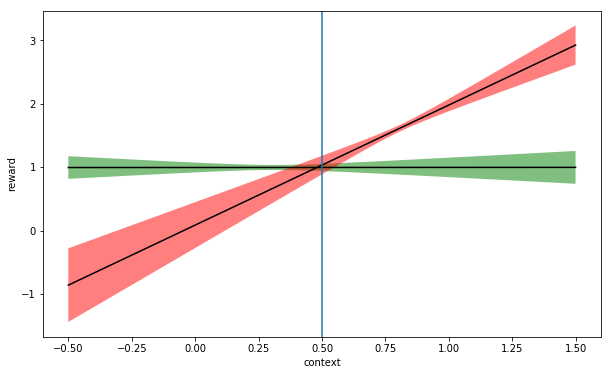

In [12]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')
plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')
plt.axvline(x = 0.5)
plt.xlabel('context')
plt.ylabel('reward')

## Comparison of the two methods

Animation of convergence

Trade-off between convergence rate, risk, and confidence level

In [ ]:
#Vary the confidence level, plot convergence rate, regret, risk